In [1]:
# Imports
import pandas as pd
import time

import numpy as np
from numpy.lib.format import open_memmap

import matplotlib.pyplot as plt
%matplotlib inline

from pycbc.types.timeseries import TimeSeries
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform

(2, 36864)


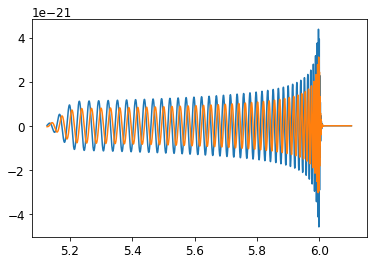

In [7]:
# Load current example I am curious about
parameters = pd.read_csv('./data/test_snr_gen/parameters.csv')
waveforms = open_memmap('./data/test_snr_gen/waveforms.npy', dtype=np.float64, mode='r')

print(np.shape(waveforms[0]))

hp = TimeSeries(waveforms[0,0], delta_t=1.0/4096)
hc = TimeSeries(waveforms[0,1], delta_t=1.0/4096)

plt.plot(hp.sample_times[21000:25000], hp[21000:25000])
plt.plot(hc.sample_times[21000:25000], hc[21000:25000])
plt.show()

In [8]:
print(parameters.iloc[0])

index        0.000000
mass_1      16.625569
mass_2      16.544892
phase        2.239735
a_1          0.092107
a_2          0.761267
tilt_1       0.758577
tilt_2       1.948285
phi_12       3.103548
phi_jl       3.889218
theta_jn     1.149060
psi          1.857503
ra           0.216274
dec          0.003856
distance    50.080124
Name: 0, dtype: float64


36864
36864
36931
36930
Total time: 0.029797077178955078


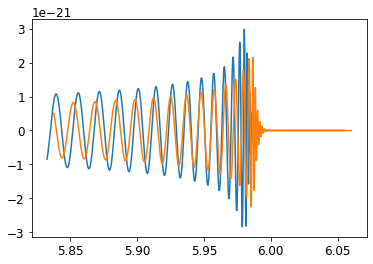

In [9]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='lal')
start_time = time.time()

hp = TimeSeries(waveforms[0,0], delta_t=1.0/4096)
hc = TimeSeries(waveforms[0,1], delta_t=1.0/4096)

print(len(hp.data))
print(len(hc.data))

ra = parameters.iloc[0]['ra']
dec = parameters.iloc[0]['dec']
pol = parameters.iloc[0]['psi']  # Check that `psi` is the right parameter

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')
l1_strain = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')

print(len(h1_strain.data))
print(len(l1_strain.data))

print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain.sample_times[23999:24911], l1_strain[23999:24911])
plt.plot(h1_strain.sample_times[23999:24911], h1_strain[23999:24911])
plt.show()

36864
36864
36864
36864
Total time: 0.6253211498260498


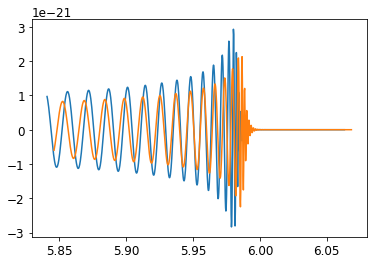

In [10]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='constant')
start_time = time.time()

hp = TimeSeries(waveforms[0,0], delta_t=1.0/4096)
hc = TimeSeries(waveforms[0,1], delta_t=1.0/4096)

print(len(hp.data))
print(len(hc.data))

ra = parameters.iloc[0]['ra']
dec = parameters.iloc[0]['dec']
pol = parameters.iloc[0]['psi']  # Check that `psi` is the right parameter

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')
l1_strain = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')

print(len(h1_strain.data))
print(len(l1_strain.data))

print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain.sample_times[23999:24911], l1_strain[23999:24911])
plt.plot(h1_strain.sample_times[23999:24911], h1_strain[23999:24911])
plt.show()

36864
36864
36864
36864
Total time: 0.02614450454711914


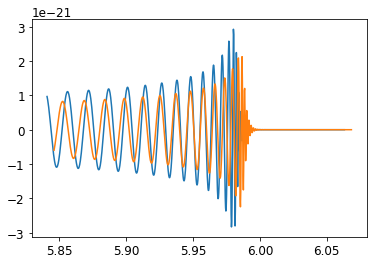

In [11]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='vary_polarization')
start_time = time.time()

hp = TimeSeries(waveforms[0,0], delta_t=1.0/4096)
hc = TimeSeries(waveforms[0,1], delta_t=1.0/4096)

print(len(hp.data))
print(len(hc.data))

ra = parameters.iloc[0]['ra']
dec = parameters.iloc[0]['dec']
pol = parameters.iloc[0]['psi']  # Check that `psi` is the right parameter

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')
l1_strain = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')

print(len(h1_strain.data))
print(len(l1_strain.data))

print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain.sample_times[23999:24911], l1_strain[23999:24911])
plt.plot(h1_strain.sample_times[23999:24911], h1_strain[23999:24911])
plt.show()

3919
3919
3986
3985


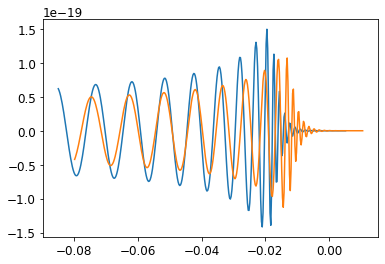

In [12]:
# Use PyCBC Detector.project_wave() to project a fresh waveform of the same parameters

ra = parameters.iloc[0]['ra']
dec = parameters.iloc[0]['dec']
pol = parameters.iloc[0]['psi']  # Check that `psi` is the right parameter

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=parameters.iloc[0]['mass_1'],
                        mass2=parameters.iloc[0]['mass_2'],
                        spin1z=parameters.iloc[0]['a_1'],
                        spin2z=parameters.iloc[0]['a_2'],
                        inclination=parameters.iloc[0]['theta_jn'],
                        coa_phase=parameters.iloc[0]['phase'],
                        delta_t=1.0/4096,
                        f_lower=30)

desired_len = 9.0 * 4096
current_len = len(hp.data)

print(current_len)
print(len(hc.data))

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol)
l1_strain = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol)

print(len(h1_strain.data))
print(len(l1_strain.data))

plt.plot(l1_strain.sample_times[3410:-205], l1_strain[3410:-205])
plt.plot(h1_strain.sample_times[3410:-205], h1_strain[3410:-205])
# plt.plot(l1_strain)
# plt.plot(h1_strain)
# plt.plot(hp.sample_times, hp)
# plt.plot(hc.sample_times, hc)

# a = -0.0164 - 0.004
# plt.axvline(-0.0164, c='black')
# plt.axvline(a, c='purple')

plt.show()